In [22]:
import pandas as pd
import numpy as np

In [23]:
df=pd.read_csv(r'C:\Users\MSI\Downloads\train.csv')
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#pandas might throw errors while dropping non-integral columns, so we make sure that it's int datatype just in case
label=df.label.astype(int)
df.drop("label",axis=1,inplace=True)
df.shape

(42000, 784)

In [28]:
#standardization is needed because ML models may not behave correctly if the data is not
#normally distributed data-Gaussian with mean=0 and variance=1

from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(df)
standardized_data.shape


(42000, 784)

In [44]:
#eigen decomposition is done to identify the principal values(eien vectors) and their components(eigen values)
from scipy.linalg import eigh
#performing eigen decompositon on covariance matrix
values,vectors=eigh(np.cov(df,rowvar=False))
print(vectors.shape)
print("last 10 eigen values:\n")
print(values[:][-10:])
print("\ncorresponding vectors:")
print(vectors[-10])

(784, 784)
last 10 eigen values:

[ 80660.73018992  95016.01443299  99315.43743442 112534.61945611
 147773.28274113 168070.0015068  184726.37342816 211051.62698822
 245885.06513832 334780.59149447]

corresponding vectors:
[-3.91782960e-14 -1.52728307e-14 -4.00761238e-14  9.89331447e-13
  8.18550956e-15  1.30253881e-14  1.36510811e-14  5.47130158e-14
  1.13797860e-14 -2.86987231e-14  2.83247818e-15  2.08332700e-14
 -3.47633164e-15 -3.04736705e-15 -1.25392318e-14 -5.18041454e-15
  2.40070550e-14 -6.91753512e-15 -1.89521250e-15 -2.00821347e-16
  1.31917250e-15  5.07804722e-17 -1.67221244e-16 -1.72601259e-15
  1.34522808e-16 -1.33711351e-16 -3.62962194e-16 -3.50561261e-17
  2.32575660e-17 -7.20805980e-17 -9.93488120e-17  1.70476816e-16
  2.20639801e-16  3.24553081e-18 -5.31436115e-20 -3.43423992e-24
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

In [45]:
#we want only a 2D matrix so let us take last 2 eigen vectors alone

# Select the last two eigenvalues and corresponding eigenvectors
values = values[-2:]
vectors = vectors[:, -2:]

# Transpose the eigenvectors to have a shape of (2, 784)
vectors = vectors.T

print("Shape of eigen value:", values.shape)
print("Shape of eigen vectors:", vectors.shape)


Shape of eigen value: (2,)
Shape of eigen vectors: (2, 784)


In [47]:
reduced_data=np.matmul(vectors,df.T)
print("reduced data shape: ",reduced_data.shape)

reduced data shape:  (2, 42000)


In [48]:
reduced_data=np.vstack((reduced_data,label))
reduced_data=reduced_data.T

In [51]:
#obtaining the reduced dataframe after dimensionality reduction

reduced_df=pd.DataFrame(reduced_data,columns=['X','Y','label'])
reduced_df['label']=reduced_df['label'].astype(int)
reduced_df.head()

,X,Y,label
0,-699.512433,103.738814,1
1,-360.752661,2466.786278,0
2,-293.966887,-121.559841,1
3,299.981655,599.578991,4
4,-449.354174,2689.044309,0


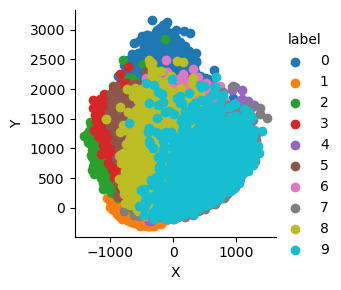

In [62]:
#providing the visualization using seaborn library
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.FacetGrid(reduced_df,hue='label').map(plt.scatter,'X','Y').add_legend()